Best Sources: [1. Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-random-forest-and-its-hyper-parameters/#h2_1),
[2. Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#h2_1)

# Random Forest
<img src = "https://editor.analyticsvidhya.com/uploads/39323steven-kamenar-MMJx78V7xS8-unsplash.jpg">

# Introduction
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

# Working of Random Forest Algorithm
Before understanding the working of the random forest we must look into the ensemble technique. Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.

# Ensemble uses two types of methods:

1. **Bagging**– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

2. **Boosting**– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

<img src="https://editor.analyticsvidhya.com/uploads/4661536426211ba43ea612c8e1a6a1ed45507.png">

As mentioned earlier, Random forest works on the Bagging principle. Now let’s dive in and understand bagging in detail.

# Bagging
Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.


<img src="https://editor.analyticsvidhya.com/uploads/77772440px-Ensemble_Bagging.svg.png">

Now let’s look at an example by breaking it down with the help of the following figure. Here the bootstrap sample is taken from actual data (Bootstrap sample 01, Bootstrap sample 02, and Bootstrap sample 03) with a replacement which means there is a high possibility that each sample won’t contain unique data. Now the model (Model 01, Model 02, and Model 03) obtained from this bootstrap sample is trained independently. Each model generates results as shown. Now Happy emoji is having a majority when compared to sad emoji. Thus based on majority voting final output is obtained as Happy emoji.

<img src="https://editor.analyticsvidhya.com/uploads/325745-Bagging-ensemble-method.png" width = 500>

# Steps involved in random forest algorithm:

1. In Random forest n number of random records are taken from the data set having k number of records.

2. Individual decision trees are constructed for each sample.

3. Each decision tree will generate an output.

4. Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

<img src="https://editor.analyticsvidhya.com/uploads/24015Random+Forest.jpg" width = 500>

# Important Features of Random Forest
1. Diversity- Not all attributes/variables/features are considered while making an individual tree, each tree is different.

2. Immune to the curse of dimensionality- Since each tree does not consider all the features, the feature space is reduced.

3. Parallelization-Each tree is created independently out of different data and attributes. This means that we can make full use of the CPU to build random forests.

4.  Train-Test split- In a random forest we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.

5.  Stability- Stability arises because the result is based on majority voting/ averaging.

# Important Hyperparameters
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

Following hyperparameters increases the speed:

1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

# Random Forest implementation
**1. Let’s import the libraries.**

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

**2. import the dataset.**

In [2]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**3. Putting Feature Variable to X and Target variable to y.**

In [5]:
# Putting feature variable to X
X = df.drop('target',axis=1)
# Putting response variable to y
y = df.target

**4.   Train-Test-Split is performed**

In [6]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [7]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((212, 13), (91, 13))

**3. Let’s import RandomForestClassifier and fit the data.**

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
# checking the oob score
rf_classifier.oob_score_

0.8018867924528302

**4. Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.**

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [13]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 41s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [14]:
grid_search.best_score_

0.8349056603773585

In [15]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

From hyperparameter tuning, we can fetch the best estimator as shown. The best set of parameters identified were max_depth=3, min_samples_leaf=5,n_estimators=25

**5. Now let’s visualize**

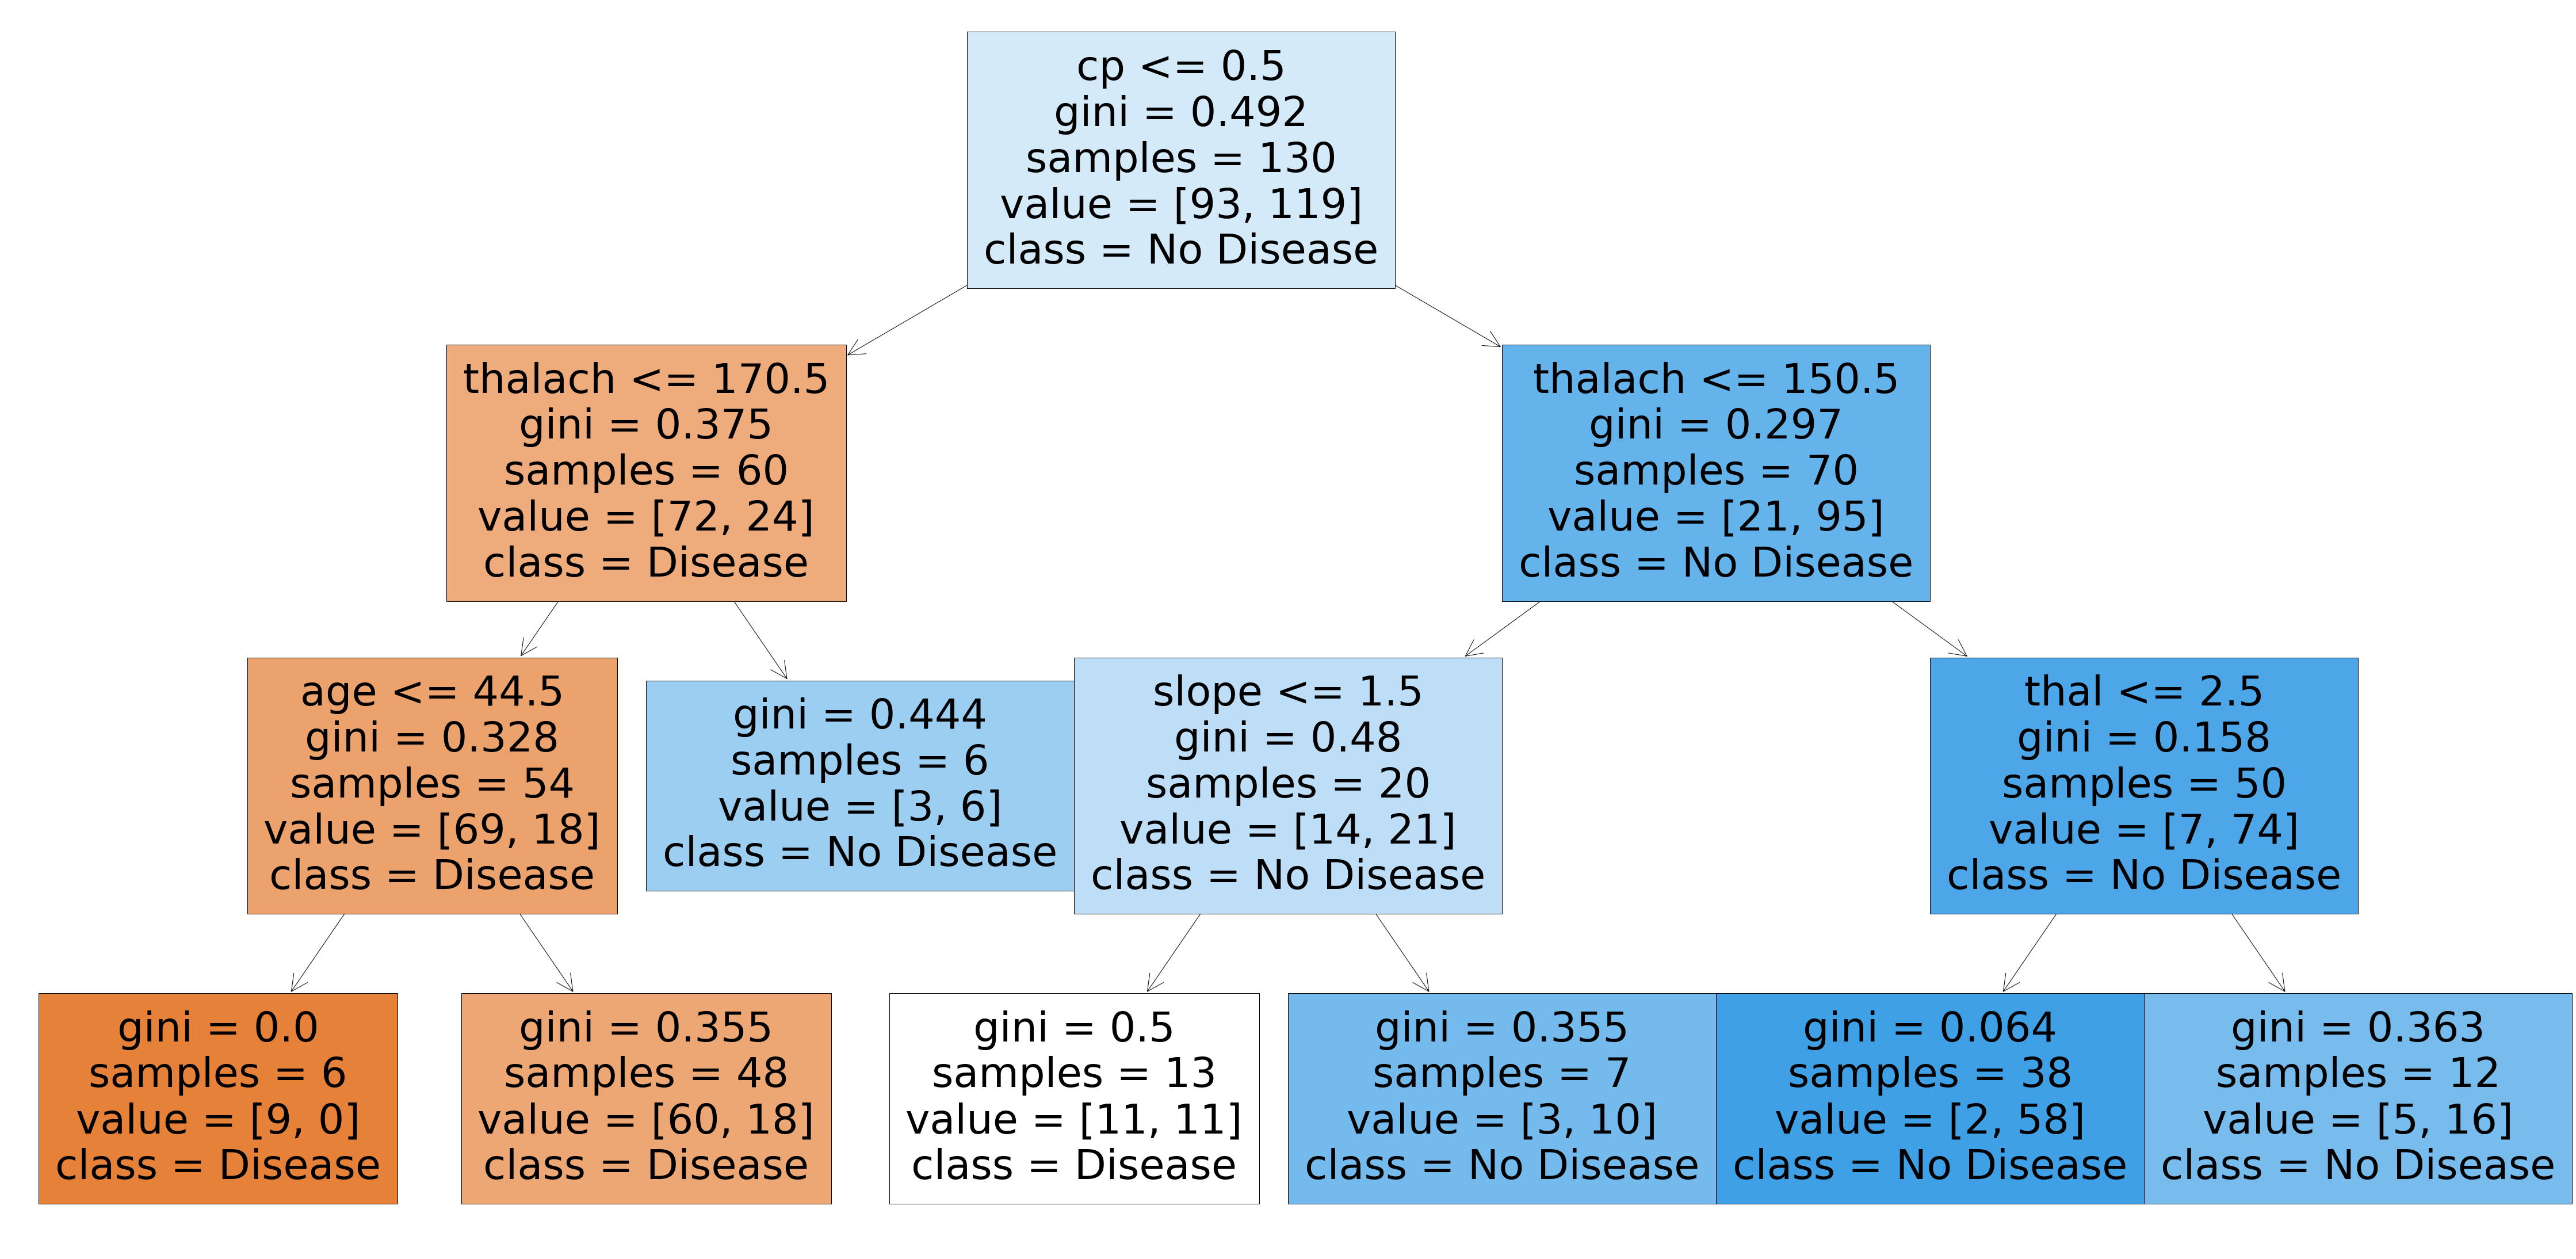

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],
          feature_names = X.columns,class_names=['Disease', "No Disease"],
          filled=True);

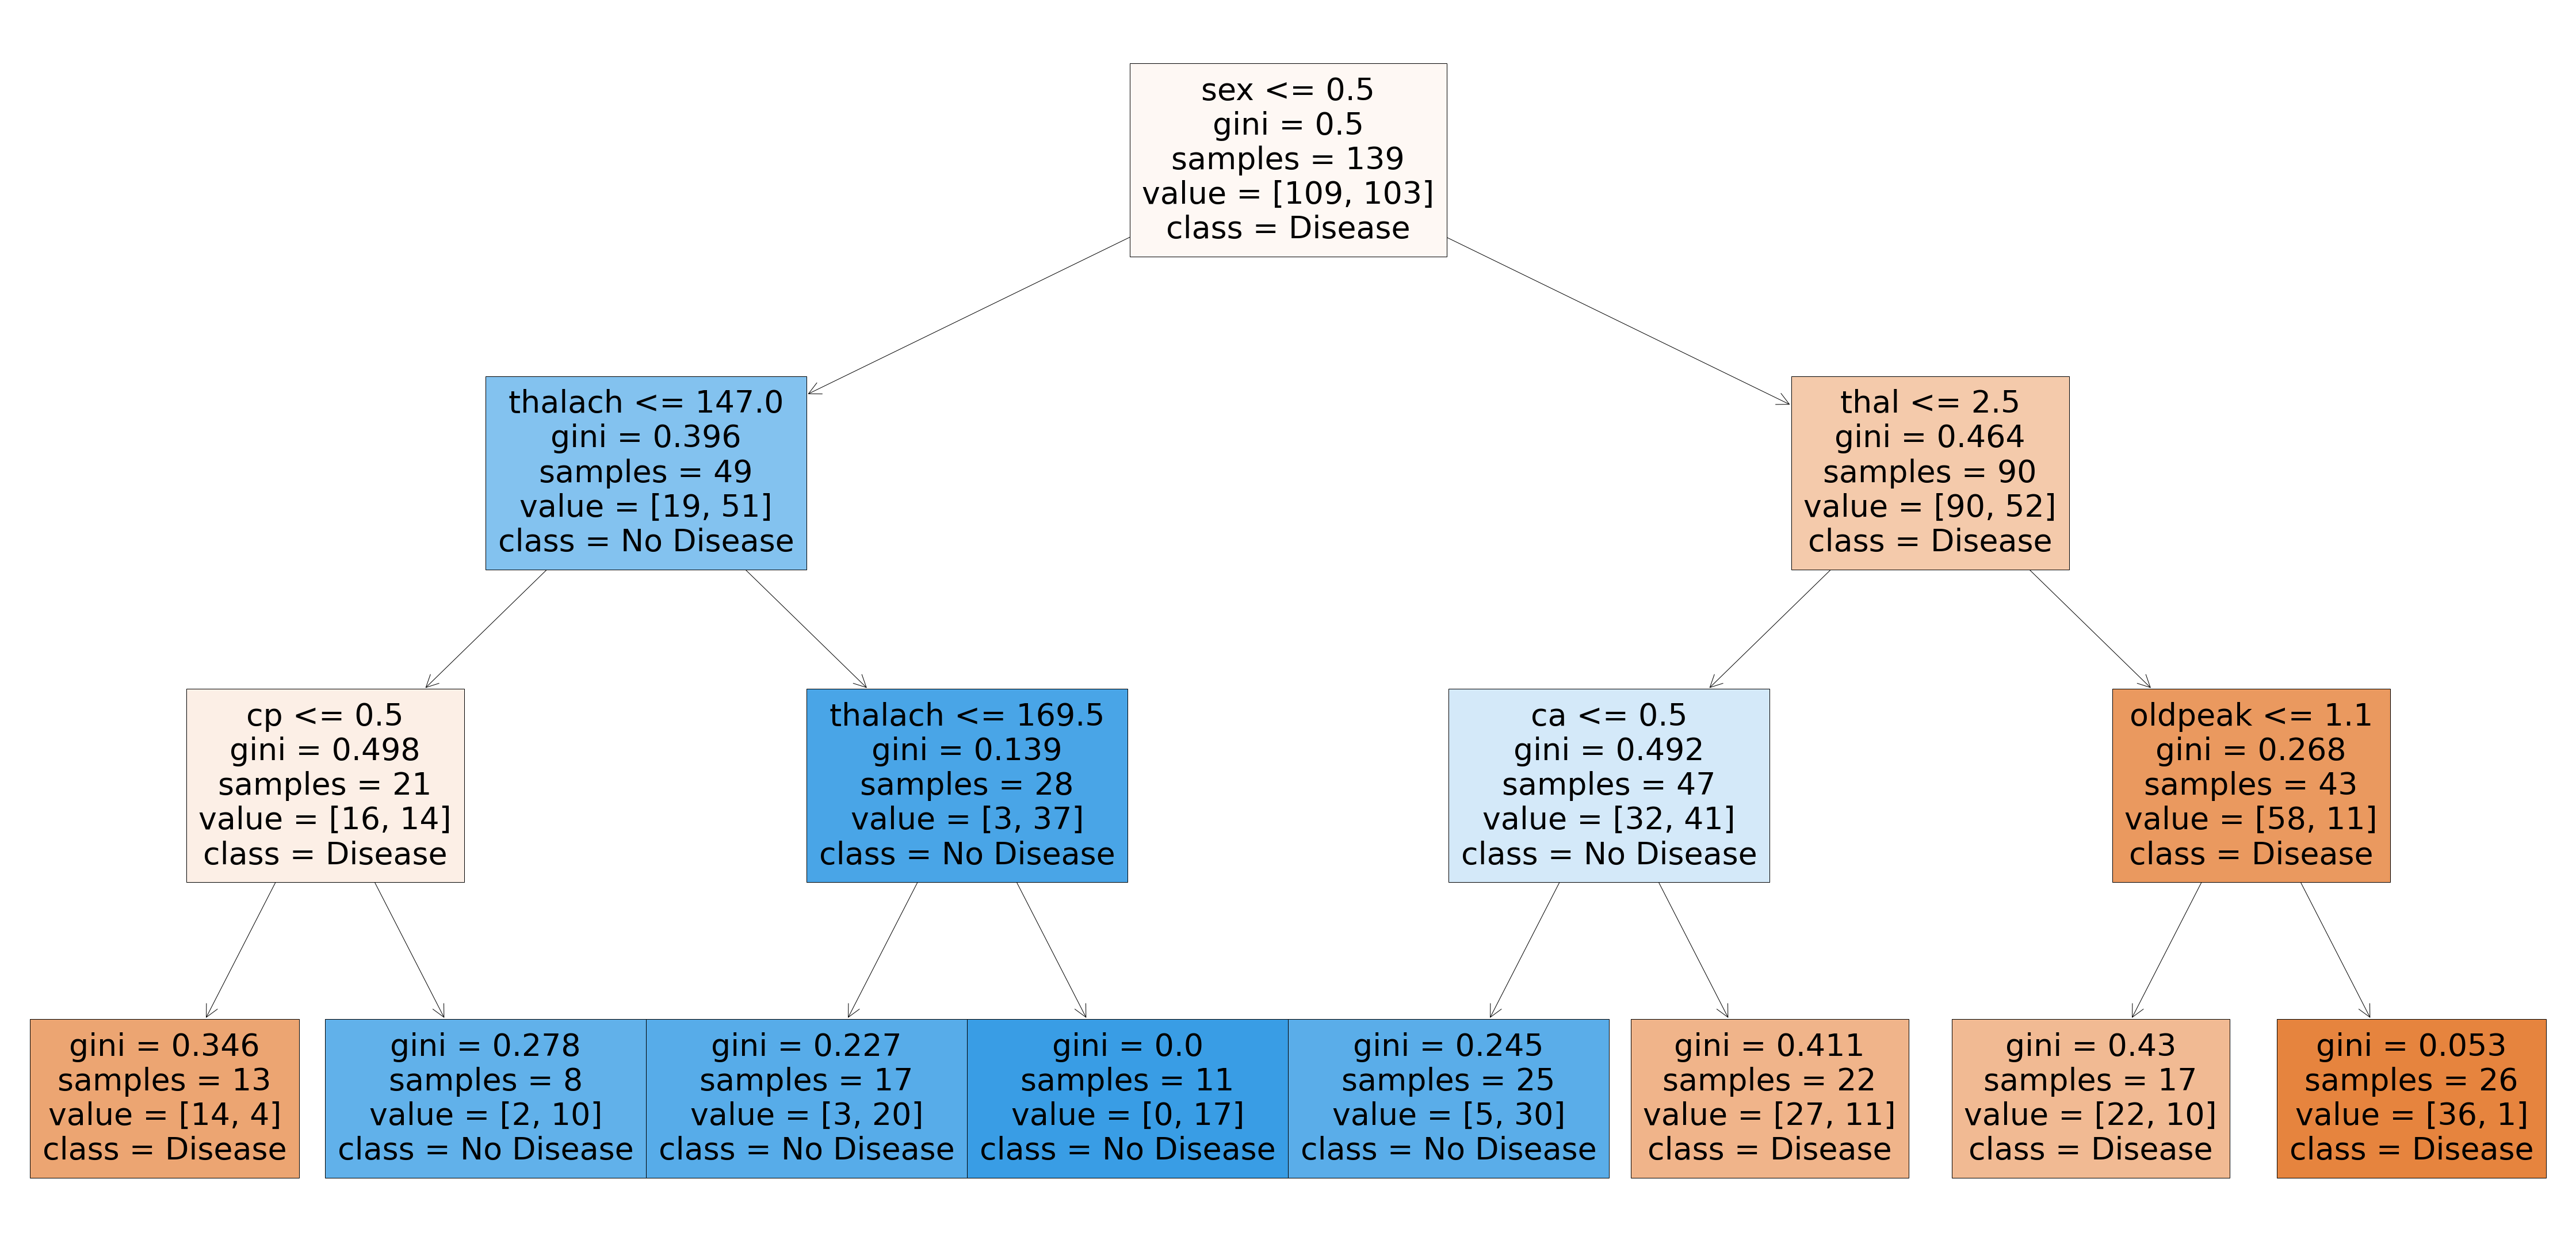

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);


The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other

# **Extra Trees**
Let’s go ahead with this topic briefly.

Whenever the Random Forest grows a tree, for each node only a random subset of features is taken into the account for splitting. One way of making tress even more random is by setting the random threshold for each feature instead of searching for the best threshold like the decision tree does.

This technique also trades high bias for low variance. The advantage of using Extra trees instead of a random forest is that it is faster, as finding the best possible threshold for each feature at every node is extremely time-consuming.

The creation of the Extra trees classifier is almost similar to that of the Random Forest Classifier. For  Classification, you can use Scikit-learn’s Extra Trees classifier class, and for regression Scikit-learn’s Extra Tree Regressor class.

It is difficult to know which would perform better or worst among random forests and extra trees, the only way for you to know is to create both and compare them using cross-validation.

# Feature Importance
By far one of the best things that Random Forest has to offer, it helps us to measure the importance of each every feature. Scikit-learn calculates it by analyzing how much a tree node that uses that feature reduces impurity on average.

Scikit-learn automatically calculates these scores for each and every feature and after that scales it so that the sum of all importance is equal to 1. To access the importance of the feature we will be using the feature_importances variable.

**6. Now let’s sort the data with the help of feature importance**

In [18]:
rf_best.feature_importances_

array([0.02710122, 0.04878956, 0.18393793, 0.02133891, 0.01571649,
       0.0013147 , 0.00243355, 0.12137129, 0.14267091, 0.1006341 ,
       0.04693598, 0.16628463, 0.12147071])

In [19]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [20]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,cp,0.183938
11,ca,0.166285
8,exang,0.142671
12,thal,0.121471
7,thalach,0.121371
9,oldpeak,0.100634
1,sex,0.048790
10,slope,0.046936
0,age,0.027101
3,trestbps,0.021339


### **Use Cases**
This algorithm is widely used in E-commerce, banking, medicine, the stock market, etc.

For example: In the Banking industry it can be used to find which customer will default on the loan.

Advantages and Disadvantages of Random Forest Algorithm

### **Advantages** 

1.  It can be used in classification and regression problems.

2. It solves the problem of overfitting as output is based on majority voting or averaging.

3. It performs well even if the data contains null/missing values.

4. Each decision tree created is independent of the other thus it shows the property of parallelization.

5. It is highly stable as the average answers given by a large number of trees are taken.

6. It maintains diversity as all the attributes are not considered while making each decision tree though it is not true in all cases.

7. It is immune to the curse of dimensionality. Since each tree does not consider all the attributes, feature space is reduced.

8. We don’t have to segregate data into train and test as there will always be 30% of the data which is not seen by the decision tree made out of bootstrap.

### **Disadvantages**

1. Random forest is highly complex when compared to decision trees where decisions can be made by following the path of the tree.

2. Training time is more compared to other models due to its complexity. Whenever it has to make a prediction each decision tree has to generate output for the given input data.

### **Summary**
Now, we can conclude that Random Forest is one of the best techniques with high performance which is widely used in various industries for its efficiency. It can handle binary, continuous, and categorical data.

Random forest is a great choice if anyone wants to build the model fast and efficiently as one of the best things about the random forest is it can handle missing values.

Overall, random forest is a fast, simple, flexible, and robust model with some limitations